## Домашнє завдання

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fashion_mnist.


Створити свою власну архітектуру мережі. Поекспериментувати з гіперпараметрами мережі:

кількість шарів;
кількість нейронів;
функції активації;
кількість епох;
розмір батчу;
вибір оптимізатора;
різні техніки регуляризації і т.д.


Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.



In [32]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import losses
from keras import metrics

In [33]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels, num_classes=10)  # у датасеті 10 класів
test_labels = to_categorical(test_labels, num_classes=10)

print("Форма навчальних зображень:", train_images.shape)
print("Форма тестових зображень:", test_images.shape)
print("Форма навчальних міток:", train_labels.shape)
print("Форма тестових міток:", test_labels.shape)


Форма навчальних зображень: (60000, 28, 28)
Форма тестових зображень: (10000, 28, 28)
Форма навчальних міток: (60000, 10)
Форма тестових міток: (10000, 10)


In [34]:
# Створення та компіляція моделі 

# model = Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid')
])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])





*Рання зупинка (Early Stopping): Рання зупинка дозволяє автоматично припинити навчання моделі, коли виявлено погіршення її продуктивності на валідаційному наборі даних, що допомагає уникнути перенавчання.*

In [94]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3) 

# history = model.fit(train_images, train_labels, epochs=10, batch_size=64, 
#                     validation_data=(test_images, test_labels),
#                     callbacks=[early_stopping])

history = model.fit(train_images, train_labels, epochs=30, batch_size=128,  # Збільшено кількість епох та розмір батчу
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0731 - accuracy: 0.9811 - val_loss: 2.1029 - val_accuracy: 0.8873
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0703 - accuracy: 0.9811 - val_loss: 2.3271 - val_accuracy: 0.8875
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0774 - accuracy: 0.9815 - val_loss: 1.9825 - val_accuracy: 0.8877
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0674 - accuracy: 0.9825 - val_loss: 2.1144 - val_accuracy: 0.8904
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0708 - accuracy: 0.9814 - val_loss: 2.1840 - val_accuracy: 0.8928
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0701 - accuracy: 0.9815 - val_loss: 2.1269 - val_accuracy: 0.9001


In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


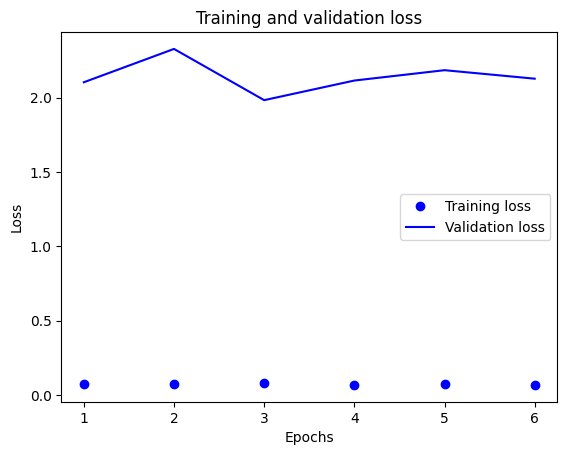

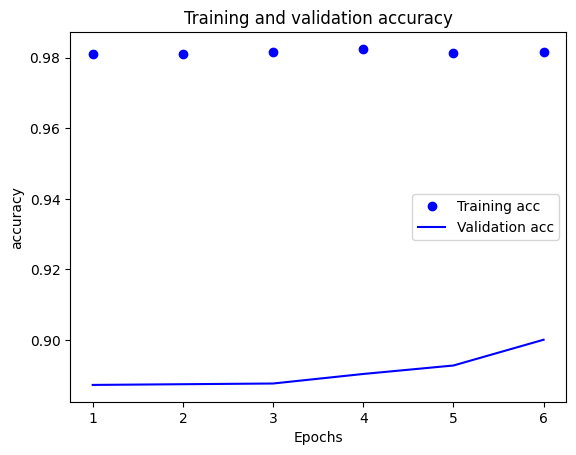

In [95]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()


In [96]:
results = model.evaluate(test_images, test_labels)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 2.1269 - accuracy: 0.9001
[2.1268672943115234, 0.9000999927520752]


accuracy: 0.9001

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               200960    
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 259274 (1012.79 KB)
Trainable params: 25